In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [2]:
#Ignoring the warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
#preparing dataframe for training dataset

df_feat_train=pd.read_csv('train.csv')
df_target_train=pd.read_csv('train_label.csv')
df_feat_train['datetime'] = pd.to_datetime(df_feat_train['datetime'])
df_feat_train['date'] = df_feat_train['datetime'].dt.date #getting time from datetime column and adding a seperate column for it
df_feat_train['time'] = df_feat_train['datetime'].dt.time #getting date from datetime column and adding a seperate column for it
df_feat_train['daynum'] = [i.day for i in df_feat_train['datetime'].dt.date] #getting date from datetime column and adding a seperate column for it
df_feat_train['month'] = [i.month for i in df_feat_train['datetime'].dt.date] #getting date from datetime column and adding a seperate column for it
df_feat_train['year'] = [i.year for i in df_feat_train['datetime'].dt.date] #getting date from datetime column and adding a seperate column for it
df_feat_train['t']= [ (int(str(i)[0:2])) for i in df_feat_train['time'] ]

temp=[]
for i in df_feat_train['datetime']:
    temp.append((i.strftime("%A"))) #getting day name from datetime column
df_feat_train['day'] = temp
temp=df_target_train.iloc[:]
df_feat_train['Total_booking']=temp #adding day name column to the dateframe

In [4]:
#re-arranging the features and adding the target column to a fresh dataframe

df_train=df_feat_train[['daynum','day','month','year','t','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','Total_booking']]
df_train.columns=['date','day','month','year','time','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','Total_booking']

In [5]:
df_train

,date,day,month,year,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,2,Wednesday,5,2012,19,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5.0
1,5,Wednesday,9,2012,4,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,139.0
2,13,Thursday,1,2011,9,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,209.0
3,18,Friday,11,2011,16,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,184.0
4,13,Tuesday,9,2011,13,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,791.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,16,Monday,1,2012,6,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,11.0
8704,10,Thursday,11,2011,1,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,1.0
8705,12,Tuesday,4,2011,3,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,92.0
8706,7,Wednesday,11,2012,1,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,31.0


In [6]:
'''
Task 1 section: 
1.)Visualizing data and getting insights, 
2.)Outlier Analysis, 
3.)Missing value analysis,
4.)Visualizing Total_booking Vs other features to generate insights,
5.)Correlation analysis
'''

'\nTask 1 section: \n1.)Visualizing data and getting insights, \n2.)Outlier Analysis, \n3.)Missing value analysis,\n4.)Visualizing Total_booking Vs other features to generate insights,\n5.)Correlation analysis\n'

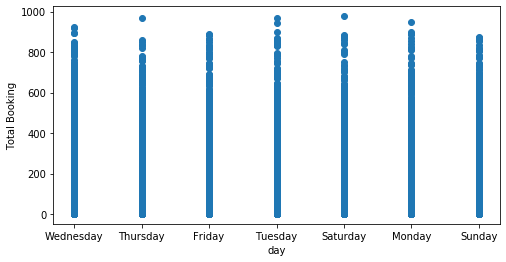

<Figure size 432x288 with 0 Axes>

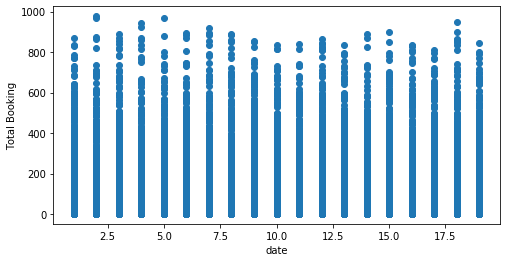

<Figure size 432x288 with 0 Axes>

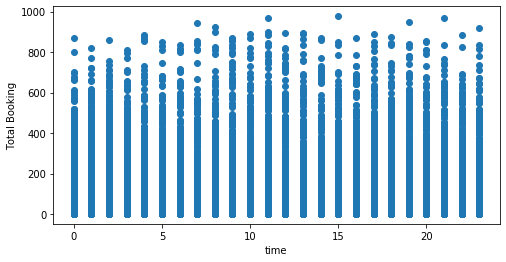

<Figure size 432x288 with 0 Axes>

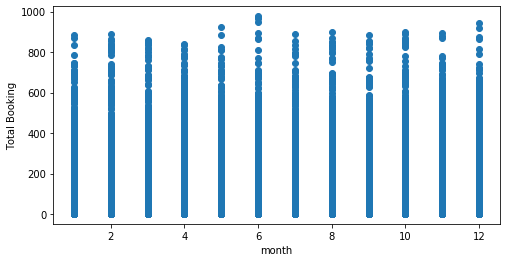

<Figure size 432x288 with 0 Axes>

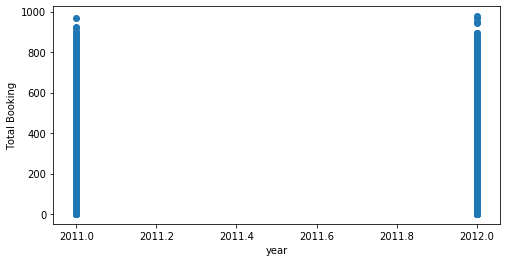

<Figure size 432x288 with 0 Axes>

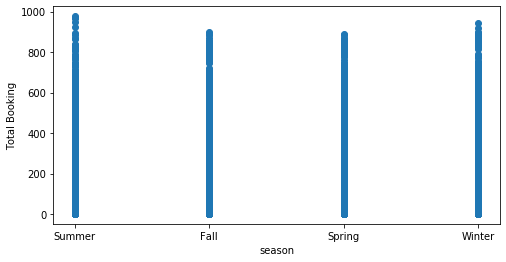

<Figure size 432x288 with 0 Axes>

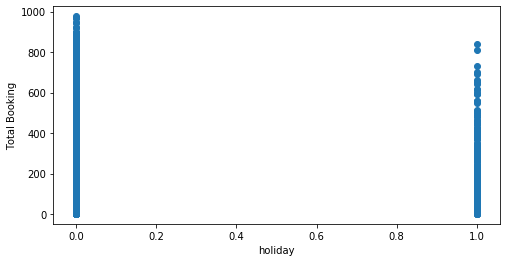

<Figure size 432x288 with 0 Axes>

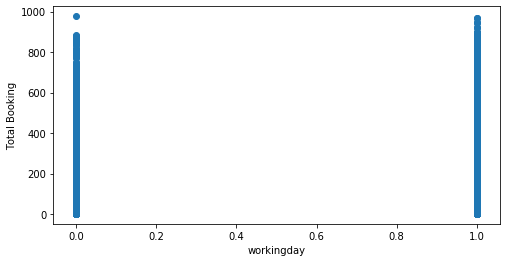

<Figure size 432x288 with 0 Axes>

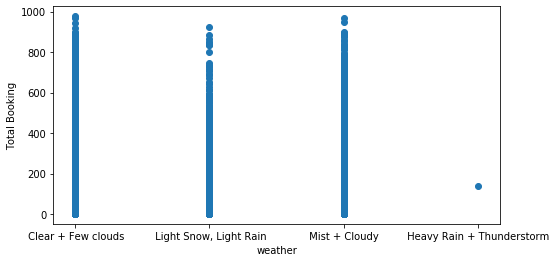

<Figure size 432x288 with 0 Axes>

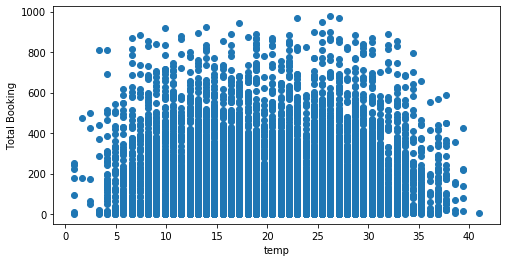

<Figure size 432x288 with 0 Axes>

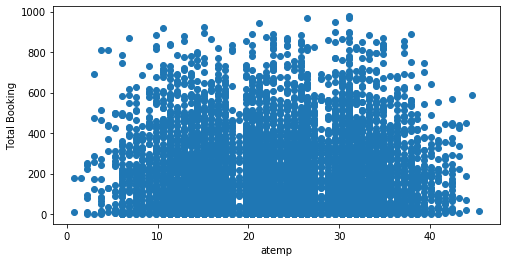

<Figure size 432x288 with 0 Axes>

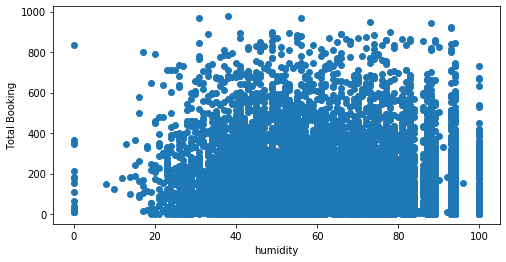

<Figure size 432x288 with 0 Axes>

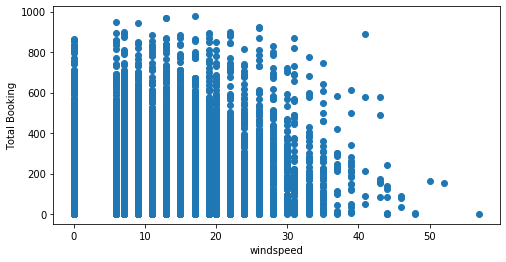

<Figure size 432x288 with 0 Axes>

In [7]:
#Task 1-(1):Visualize data using different visualizations to generate interesting insights
#AND
#Task 1-(4):Visualizing Total_booking Vs other features to generate insights

#using scatter plot for plotting each feature with respect to target variable(Total_booking) for getting insights on dataset

ar=['day','date','time','month','year','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']
for x in ar:
    fig, ax = plt.subplots(figsize=(8,4))
    ax.scatter(df_train[x], df_train['Total_booking'])
    ax.set_xlabel(x)
    ax.set_ylabel('Total Booking')
    plt.figure()

#plots are in order: [day','season','holiday','workingday','weather','temp','atemp','humidity','windspeed'] with Total_booking

In [8]:
#Task 1-(1):Visualize data using different visualizations to generate interesting insights
#AND
#Task 1-(4):Visualizing Total_booking Vs other features to generate insights

'''
Some insights from the data:
1) The number of bookings are relatively less on Sundays as compared to other days
2) The number of bookings are maximum in Summer season
3) The number of bookings are relatively less on holidays as compared to other days
4) The number of bookings are relatively less on non working days as compared to working days
5) The number of bookings are extrememly less and rare whenever the weather conditions have heavy rain and thunderstorm
6) The number of bookings are very less in extreme tempratures(too high or too low) and relatively high in moderate tempratures
7) The number of bookings are very less in extreme atemp(too high or too low) and relatively high in moderate atemp
8) The number of bookings are very less in zero or low humidity cliimate, relatively higher in high humidity climate and
   maximum in moderate humidity climate
9) The number of bookings are extrememly less and rare whenever the wind speed is too high

'''

'\nSome insights from the data:\n1) The number of bookings are relatively less on Sundays as compared to other days\n2) The number of bookings are maximum in Summer season\n3) The number of bookings are relatively less on holidays as compared to other days\n4) The number of bookings are relatively less on non working days as compared to working days\n5) The number of bookings are extrememly less and rare whenever the weather conditions have heavy rain and thunderstorm\n6) The number of bookings are very less in extreme tempratures(too high or too low) and relatively high in moderate tempratures\n7) The number of bookings are very less in extreme atemp(too high or too low) and relatively high in moderate atemp\n8) The number of bookings are very less in zero or low humidity cliimate, relatively higher in high humidity climate and\n   maximum in moderate humidity climate\n9) The number of bookings are extrememly less and rare whenever the wind speed is too high\n\n'

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


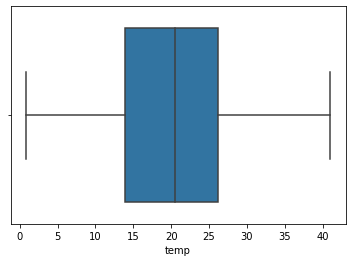

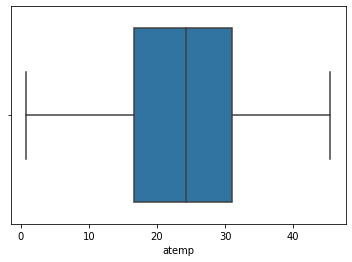

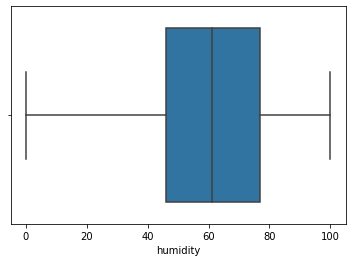

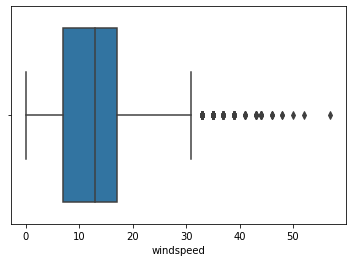

<Figure size 432x288 with 0 Axes>

In [9]:
#Task 1-(2): Outlier Analysis

#using box plot for outlier analysis on continuos feature variables 'temp','atemp','humidity','windspeed'

temp=['temp','atemp','humidity','windspeed']
for x in temp:
    print(sns.boxplot(df_train[x]))
    plt.figure()

In [10]:
#Task 1-(2) : Outlier Analysis

#there are a lot of outliers present in column windspeed

In [11]:
#Task 1-(3) : Missing value Analysis

#missing values analysis for all the columns of dataset

ar=['date','day','month','year','time','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','Total_booking']
for x in ar:
    print("Missing values in",x," is ",(8708-df_train[x].isna().value_counts()[0]))

Missing values in date  is  0
Missing values in day  is  0
Missing values in month  is  0
Missing values in year  is  0
Missing values in time  is  0
Missing values in season  is  0
Missing values in holiday  is  0
Missing values in workingday  is  0
Missing values in weather  is  0
Missing values in temp  is  0
Missing values in atemp  is  0
Missing values in humidity  is  0
Missing values in windspeed  is  0
Missing values in Total_booking  is  1


In [12]:
#Task 1-(3) : Missing value Analysis

#as there is only 1 data point which has missing value for the target columnm it's safe to drop that data point

print(df_train.shape)
df_train=df_train.dropna()
print(df_train.shape)

(8708, 14)
(8707, 14)


In [13]:
#preparing dataframe with one hot encoding of categorical features

df=df_train[['day','season','weather']]
#le = OneHotEncoder()
df = pd.get_dummies(df)
print(df)
df_train=df_train[['date','month','year','time','holiday','workingday','temp','atemp','humidity','windspeed','Total_booking']]
df_train= pd.concat([df_train,df],axis=1)

      day_Friday  day_Monday  day_Saturday  day_Sunday  day_Thursday  \
0              0           0             0           0             0   
1              0           0             0           0             0   
2              0           0             0           0             1   
3              1           0             0           0             0   
4              0           0             0           0             0   
...          ...         ...           ...         ...           ...   
8702           0           0             0           0             1   
8703           0           1             0           0             0   
8704           0           0             0           0             1   
8705           0           0             0           0             0   
8706           0           0             0           0             0   

      day_Tuesday  day_Wednesday  season_Fall  season_Spring  season_Summer  \
0               0              1            0           

In [14]:
df_train

,date,month,year,time,holiday,workingday,temp,atemp,humidity,windspeed,...,day_Tuesday,day_Wednesday,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2,5,2012,19,0,1,22.14,25.760,77,16.9979,...,0,1,0,0,1,0,1,0,0,0
1,5,9,2012,4,0,1,28.70,33.335,79,19.0012,...,0,1,1,0,0,0,1,0,0,0
2,13,1,2011,9,0,1,5.74,6.060,50,22.0028,...,0,0,0,1,0,0,1,0,0,0
3,18,11,2011,16,0,1,13.94,16.665,29,8.9981,...,0,0,0,0,0,1,1,0,0,0
4,13,9,2011,13,0,1,30.34,33.335,51,19.0012,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8702,6,1,2011,13,0,1,10.66,13.635,35,7.0015,...,0,0,0,1,0,0,1,0,0,0
8703,16,1,2012,6,1,0,4.10,6.820,54,6.0032,...,0,0,0,1,0,0,1,0,0,0
8704,10,11,2011,1,0,1,16.40,20.455,87,0.0000,...,0,0,0,0,0,1,0,0,0,1
8705,12,4,2011,3,0,1,23.78,27.275,56,8.9981,...,1,0,0,0,1,0,0,0,0,1


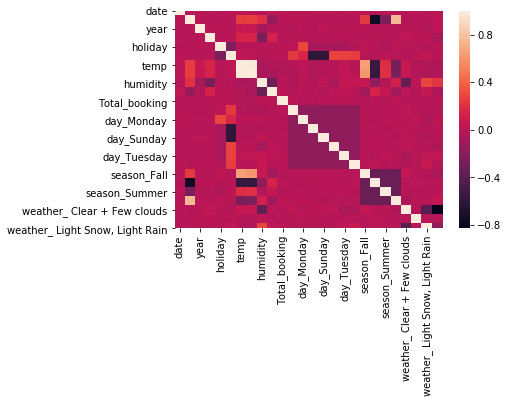

In [15]:
#Task 1-(5) : Correlation Analysis

#correlation analysis of dataset (after labelencoding of categorical features)

sns.heatmap(df_train.corr())

In [16]:
#Task 1-(2) : Outlier Analysis

#removing outliers present in windspeed column

z = np.abs(stats.zscore(df_train[['windspeed']]))
df_train = df_train[(z < 3).all(axis=1)]



AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 432x288 with 0 Axes>

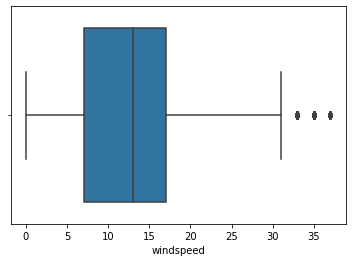

<Figure size 432x288 with 0 Axes>

In [17]:
#Task 1-(2) : Outlier Analysis

#using box plot for verifying that outliers are reduced in windspeed column

print(sns.boxplot(x=df_train['windspeed']))
plt.figure()


In [18]:
df_train
#finally a dataset which we can use to build our models with 8659 rows

,date,month,year,time,holiday,workingday,temp,atemp,humidity,windspeed,...,day_Tuesday,day_Wednesday,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2,5,2012,19,0,1,22.14,25.760,77,16.9979,...,0,1,0,0,1,0,1,0,0,0
1,5,9,2012,4,0,1,28.70,33.335,79,19.0012,...,0,1,1,0,0,0,1,0,0,0
2,13,1,2011,9,0,1,5.74,6.060,50,22.0028,...,0,0,0,1,0,0,1,0,0,0
3,18,11,2011,16,0,1,13.94,16.665,29,8.9981,...,0,0,0,0,0,1,1,0,0,0
4,13,9,2011,13,0,1,30.34,33.335,51,19.0012,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8702,6,1,2011,13,0,1,10.66,13.635,35,7.0015,...,0,0,0,1,0,0,1,0,0,0
8703,16,1,2012,6,1,0,4.10,6.820,54,6.0032,...,0,0,0,1,0,0,1,0,0,0
8704,10,11,2011,1,0,1,16.40,20.455,87,0.0000,...,0,0,0,0,0,1,0,0,0,1
8705,12,4,2011,3,0,1,23.78,27.275,56,8.9981,...,1,0,0,0,1,0,0,0,0,1


In [19]:
'''
Task 2 section: 
1.)feature engineering,
2.)grid search, 
3.)regression analysis, 
4.)ensemble models
'''

'\nTask 2 section: \n1.)feature engineering,\n2.)grid search, \n3.)regression analysis, \n4.)ensemble models\n'

In [20]:
#Task 2-(1) : Feature engineering

#using all features for calculating feature importances
features=df_train
features=features.drop(['Total_booking'], axis=1)
features=features.drop(['atemp'], axis=1)
#atemp and temp are highly correlated so we'll remove one of them for better regression model
target=df_train['Total_booking']

In [21]:
#Task 2-(1) : Feature engineering

#calculating feature importances
rf=RandomForestRegressor()
rf.fit(features,target)
rf.feature_importances_

feature_importances = pd.DataFrame(rf.feature_importances_,
         index = features.columns,
                                   columns=['importance'])
np.round(feature_importances,3)



,importance
date,0.100
month,0.051
year,0.023
time,0.198
holiday,0.004
workingday,0.012
temp,0.144
humidity,0.163
windspeed,0.145
day_Friday,0.014


In [22]:
#Task 2-(1) : Feature engineering

#keeping the features with feature importances>0.05

feat=(feature_importances[feature_importances>0.05])
feat=feat.dropna()
features=df_train[feat.index]
target=df_train['Total_booking']

In [23]:
#Task 2-(3) : Regression Analysis

#comparison of regression models based on their r2-scores

linreg=LinearRegression()
lasso=Lasso(alpha=0.1)
ridge=Ridge(alpha=0.1)
linreg.fit(features,target)
lasso.fit(features,target)
ridge.fit(features,target)

ypred=linreg.predict(features)
print(r2_score(target,ypred))

ypred=lasso.predict(features)
print(r2_score(target,ypred))

ypred=ridge.predict(features)
print(r2_score(target,ypred))

#it turns out linear models are performing very poor on training data itself so tweaks in hyperparameters also won't be much effective
#tree based ensemble models might perform better on this problem, let's try tree based algorithms as well
#the goal is to filter out bad performing algorithms and the ones which will perform considerably good will move on to hyperparameter tuning

0.0008357054708550971
0.0008356381613948693
0.0008357054708550971


In [24]:
#Task 2-(4) : Ensemble Models

#comparison of ensemble models on their r2-score
rf=RandomForestRegressor()
ad=AdaBoostRegressor(base_estimator=RandomForestRegressor(),loss='square')
gb=GradientBoostingRegressor(max_depth=12)
xb=XGBRegressor(max_depth=12)

rf.fit(features,target)
ad.fit(features,target)
gb.fit(features,target)
xb.fit(features,target)

ypred=rf.predict(features)
print("RandomForestRegressor:")
print(r2_score(target,ypred))

ypred=ad.predict(features)
print("AdaBoostRegressor:")
print(r2_score(target,ypred))

ypred=gb.predict(features)
print("GradientBoostingRegressor:")
print(r2_score(target,ypred))

ypred=xb.predict(features)
print("XGBRegressor:")
print(r2_score(target,ypred))

#as these scores are on training dataset only, we'll tune hyperparameters to make this perform good on test dataset as well

[01:43:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RandomForestRegressor:
0.7805579118320237
AdaBoostRegressor:
0.8419272399505999
GradientBoostingRegressor:
0.9627518320575327
XGBRegressor:
0.9002147989513649


In [25]:
#So finally we have reached a conclusion that ensemble models will perform better than linear models on this regresison problem
#So we will now tune hyperparameters for all ensemble models and check the scores then

In [26]:
#Task 2-(2) : GridSearch


param={'learning_rate':[0.1,0.01], 'n_estimators':[100, 150], 'max_depth':[10,15] }

gb=GridSearchCV(GradientBoostingRegressor(),param_grid=param)
gb.fit(features,target)

#Hyperparameter tuning for GradientBoostingRegressor

print("best scores: ", gb.best_score_)
print("best estimator :", gb.best_estimator_)



best scores:  -0.04274902744304438
best estimator : GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [27]:
#Task 2-(2) : GridSearch

param = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.1]}

xb=GridSearchCV(XGBRegressor(), param_grid=param)
xb.fit(features,target)
xb.best_score_

#Hyperparameter tuning for XGBRegressor

print("best scores: ", xb.best_score_)
print("best estimator :", xb.best_estimator_)



[01:45:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:45:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:45:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:45:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:45:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:45:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:45:21] WARNI

In [28]:
#Task 2-(2) : GridSearch


param = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.1, 1],
 'loss' : ['linear', 'square']
 }

ab=GridSearchCV(AdaBoostRegressor(), param_grid=param)
ab.fit(features,target)
ab.best_score_

#Hyperparameter tuning for AdaBoostRegressor

print("best scores: ", ab.best_score_)
print("best estimator :", ab.best_estimator_)


best scores:  -0.003950874703989453
best estimator : AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
                  n_estimators=50, random_state=None)


In [29]:
#Task 2-(2) : GridSearch

param = {
    'bootstrap': [True],
    'max_depth': [12],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]
}



rf=GridSearchCV(RandomForestRegressor(), param_grid=param)
rf.fit(features,target)
rf.best_estimator_
rf.best_score_

#Hyperparameter tuning for RandomForestRegressor
print("best scores: ", rf.best_score_)
print("best estimator :", rf.best_estimator_)


best scores:  -0.03780400745973079
best estimator : RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [30]:

#So both set of Tasks 1 and 2 are done and the conclusion is that RandomForestRegressor is performing best
#So we will build the same model using these hyperparameters and then we'll calculate r2 score for test dataset


In [31]:
'''
Conclusion: RandomForestRegressor is performing the best out of all models
'''

'\nConclusion: RandomForestRegressor is performing the best out of all models\n'

In [32]:
rf=RandomForestRegressor()
rf.fit(features,target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [33]:
#preparing dataframe for test dataset
#note that this will overwrite the variables defined, So it'd be good to not run cells randomly and make sure they follow sequence

df_feat_train=pd.read_csv('test.csv')
df_target_train=pd.read_csv('test_label.csv')
df_feat_train['datetime'] = pd.to_datetime(df_feat_train['datetime'])
df_feat_train['date'] = df_feat_train['datetime'].dt.date #getting time from datetime column and adding a seperate column for it
df_feat_train['time'] = df_feat_train['datetime'].dt.time #getting date from datetime column and adding a seperate column for it
df_feat_train['daynum'] = [i.day for i in df_feat_train['datetime'].dt.date] #getting date from datetime column and adding a seperate column for it
df_feat_train['month'] = [i.month for i in df_feat_train['datetime'].dt.date] #getting date from datetime column and adding a seperate column for it
df_feat_train['year'] = [i.year for i in df_feat_train['datetime'].dt.date] #getting date from datetime column and adding a seperate column for it
df_feat_train['t']= [ (int(str(i)[0:2])) for i in df_feat_train['time'] ]

temp=[]
for i in df_feat_train['datetime']:
    temp.append((i.strftime("%A"))) #getting day name from datetime column
df_feat_train['day'] = temp
temp=df_target_train.iloc[:]
df_feat_train['Total_booking']=temp #adding day name column to the dateframe

In [34]:
#re-arranging the features and adding the target column to a fresh dataframe

df_train=df_feat_train[['daynum','day','month','year','t','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','Total_booking']]
df_train.columns=['date','day','month','year','time','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','Total_booking']

#preparing dataframe with one hot encoding of categorical features

df=df_train[['day','season','weather']]
#le = OneHotEncoder()
df = pd.get_dummies(df)
print(df)
df_train=df_train[['date','month','year','time','holiday','workingday','temp','atemp','humidity','windspeed','Total_booking']]
df_train= pd.concat([df_train,df],axis=1)

      day_Friday  day_Monday  day_Saturday  day_Sunday  day_Thursday  \
0              0           0             0           0             1   
1              0           0             1           0             0   
2              0           0             0           1             0   
3              0           0             0           0             1   
4              0           0             1           0             0   
...          ...         ...           ...         ...           ...   
2173           0           0             0           0             1   
2174           0           0             0           0             1   
2175           0           0             0           0             0   
2176           0           0             0           0             1   
2177           0           0             0           0             0   

      day_Tuesday  day_Wednesday  season_Fall  season_Spring  season_Summer  \
0               0              0            0           

In [35]:
df_train=df_train.dropna()
features=df_train[feat.index]
target=df_train['Total_booking']
ypred=rf.predict(features)
print("\nR2 Score for Test Dataset : ", np.abs(r2_score(target,ypred)))

#R2 Score on Test dataset
#Note that this dataset is a dummy dataset so the scores can not necessarily be good enough 


R2 Score for Test Dataset :  0.20927791252187622


In [36]:
'''
Conclusion: RandomForestRegressor is performing the best out of all models and above is the R2 Score for the same
'''

'\nConclusion: RandomForestRegressor is performing the best out of all models and above is the R2 Score for the same\n'